<a href="https://colab.research.google.com/github/ajkc-dev/research-deeplearning-tensorflow-keras/blob/main/ML_Classification_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We start by importing the modules that we will need. In the previous example, we normalized
our data using the DataFrame operations. In this example, we will make use of the Keras
Normalization layer. **The Normalization layer shifts the data to a zero mean and one standard**
deviation. Also, since we have more than one independent variable, we will use Seaborn to
visualize the relationship between different variables:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

2. Let us first download the data from the UCI ML repo.

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower',
'weight', 'acceleration', 'model_year', 'origin']
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
sep=' ', skipinitialspace=True)

3. The data consists of eight features: mpg, cylinders, displacement, horsepower, weight,
acceleration, model year, and origin. Though the origin of the vehicle can also affect the fuel
efficiency “mpg” (miles per gallon), we use only seven features to predict the mpg value. Also,
we drop any rows with NaN values:

In [6]:
data = data.drop('origin', axis=1)
print(data.isna().sum())
data = data.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


> The error message `TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given` indicates that you are passing too many arguments to the `drop()` method of your Pandas DataFrame.
In older versions of Pandas, you could specify the `axis` parameter as `0` for rows and `1` for columns directly as a positional argument. However, in more recent versions, the `axis` parameter should be explicitly named.
To fix this, you need to specify `axis=1` when dropping a column.
Here's how to correct your code:

```python
data = data.drop('origin', axis=1)
print(data.isna().sum())
data = data.dropna()
```

> By adding `axis=1`, you are explicitly telling Pandas to drop the column labeled 'origin'.

4. We divide the dataset into training and test datasets. Here, we are keeping 80% of the 392
datapoints as training data and 20% as test dataset:

In [7]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

5. Next, we use Seaborn’s pairplot to visualize the relationship between the different variables:

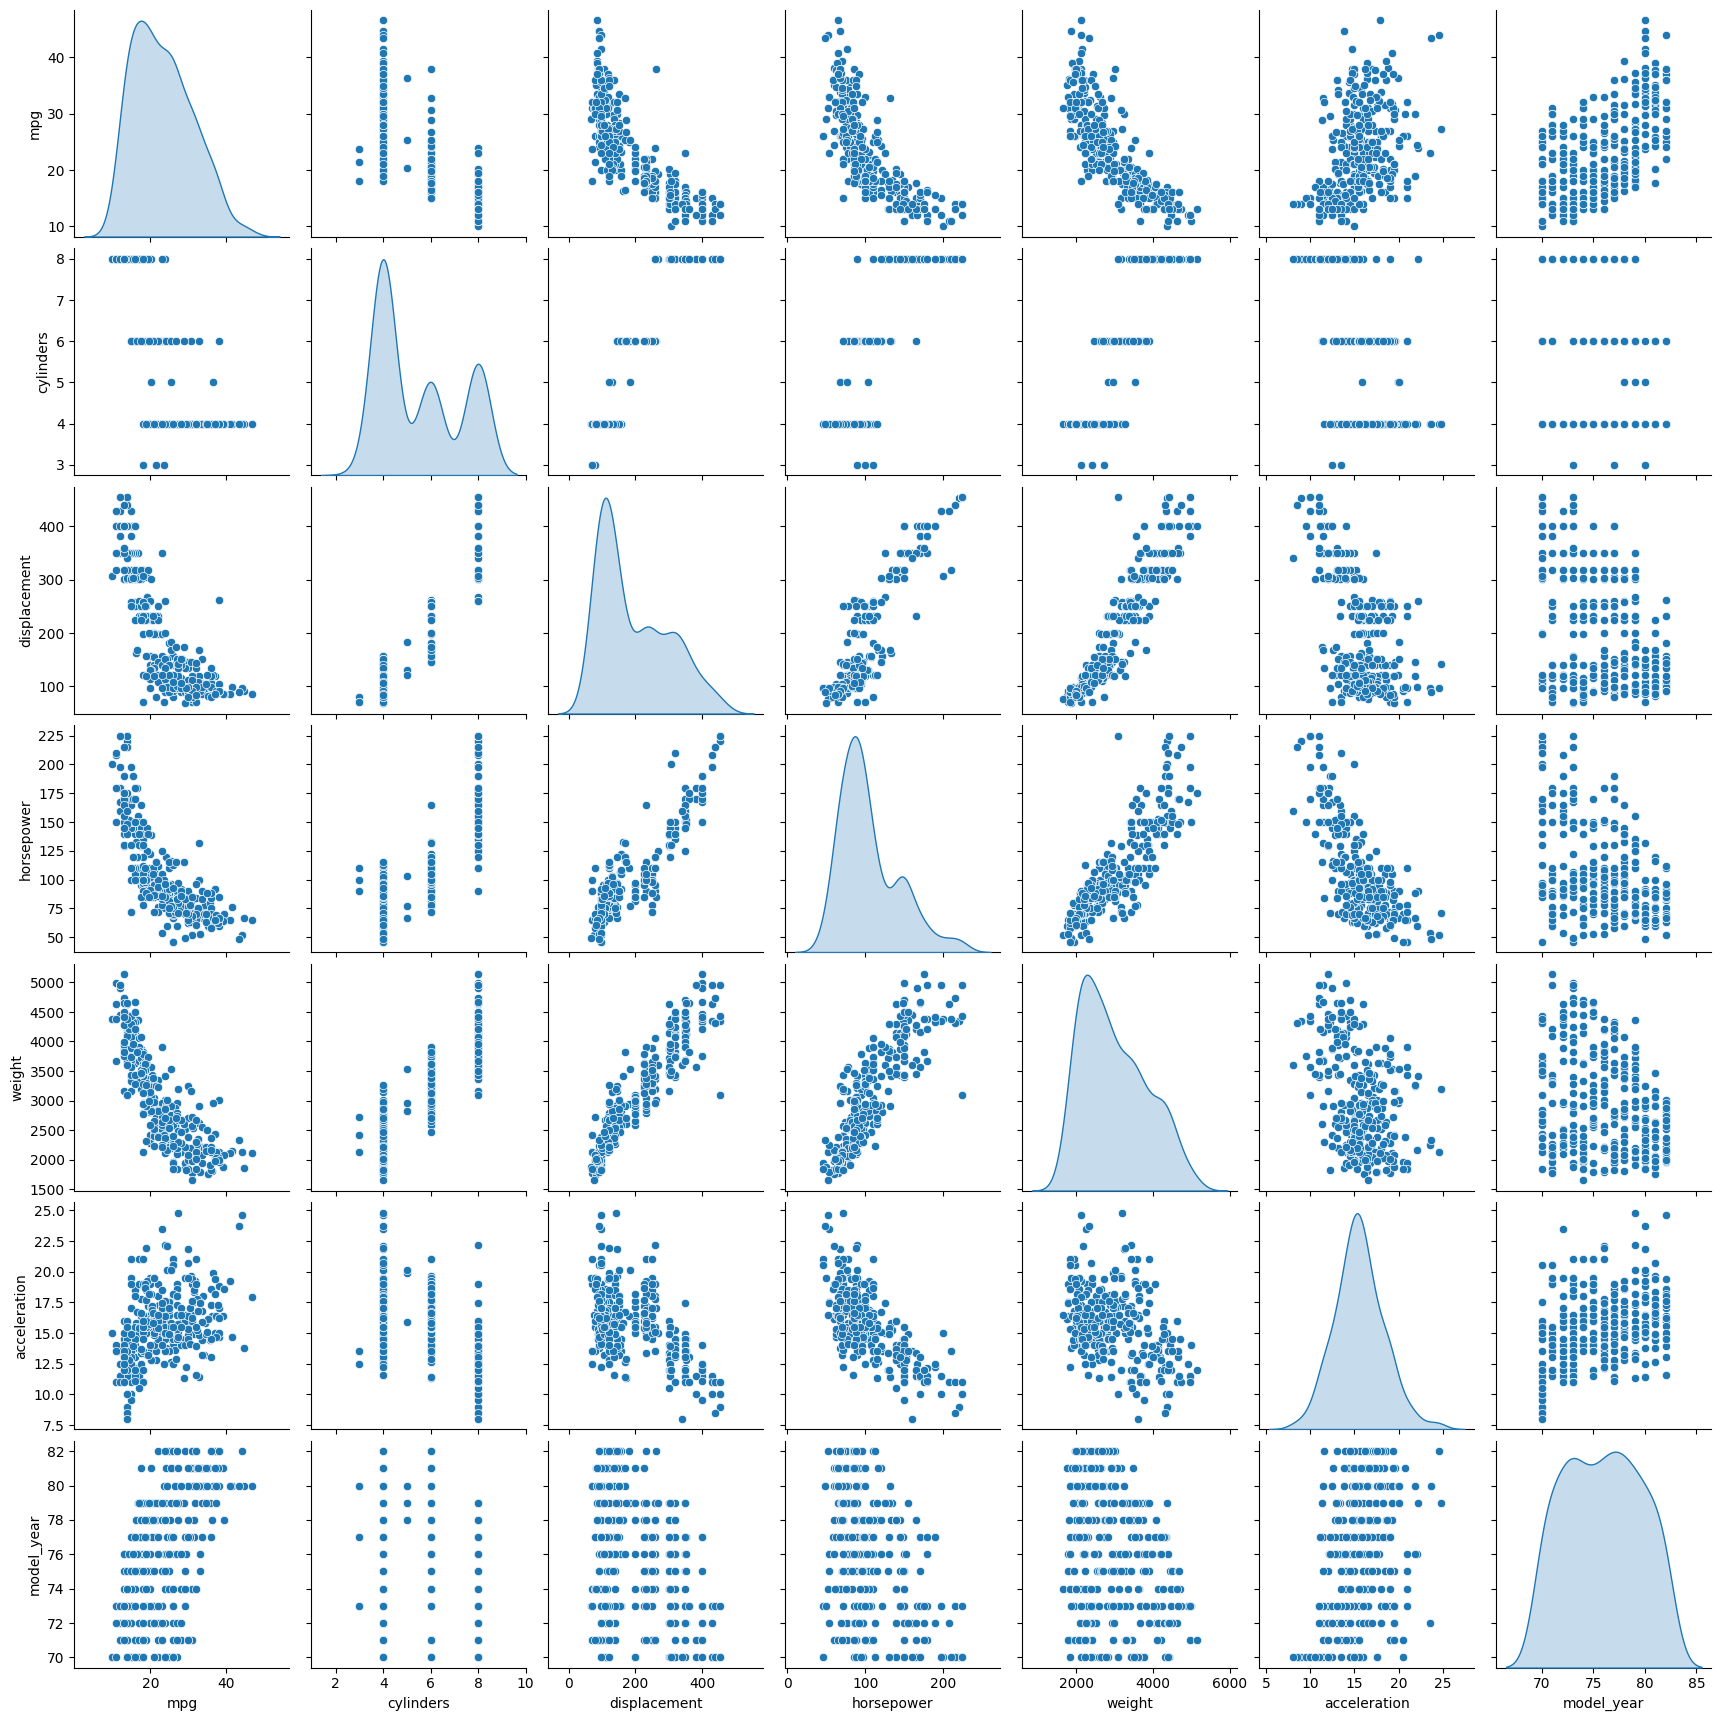

In [8]:
sns.pairplot(train_dataset[['mpg', 'cylinders',
'displacement','horsepower', 'weight', 'acceleration', 'model_year']],
diag_kind='kde')

6. We can see that mpg (fuel efficiency) has dependencies on all the other variables, and the
dependency relationship is non-linear, as none of the curves are linear:

7. For convenience, we also separate the variables into input variables and the label that we
want to predict:

In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

8. Now, we use the Normalization layer of Keras to normalize our data. Note that while we
normalized our inputs to a value with mean 0 and standard deviation 1, the output prediction
'mpg' remains as it is:

In [10]:
#Normalize
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

9. We build our model. The model has two hidden layers, with 64 and 32 neurons, respectively.
For the hidden layers, we have used Rectified Linear Unit (ReLU) as our activation function;
this should help in approximating the non-linear relation between fuel efficiency and the rest
of the variables:

In [11]:
model = K.Sequential([
data_normalizer,
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(1, activation=None)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

10. Earlier, we used stochastic gradient as the optimizer; this time, we try the Adam optimizer
(see Chapter 1, Neural Network Foundations with TF, for more details). The loss function for the
regression we chose is the mean squared error again:

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

11. Next, we train the model for 100 epochs:

In [13]:
history = model.fit(x=train_features,y=train_labels, epochs=100,
verbose=1, validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 591.3181 - val_loss: 577.0018
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 543.6548 - val_loss: 550.2340
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 519.5746 - val_loss: 520.1432
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 484.5990 - val_loss: 485.1463
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 464.1622 - val_loss: 443.0583
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 425.2130 - val_loss: 393.2047
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 388.1244 - val_loss: 337.0222
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 339.1078 - val_loss: 275.9525
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 271.8748 - val_loss: 214.7288
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 205.8632 - val_loss: 158.1689
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 152.0161 - val_loss: 112.2127
Epoch 12/100
8/8 ━━━━━━━━━━━━━

12. Cool, now that the model is trained, we can check if our model is overfitted, underfitted, or
properly fitted by plotting the loss curve. Both validation loss and training loss are near each
other as we increase the training epochs; this suggests that our model is properly trained:

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

13. Let us finally compare the predicted fuel efficiency and the true fuel efficiency on the test dataset.
Remember that the model has not seen a test dataset ever, thus this prediction is from the
model’s ability to generalize the relationship between inputs and fuel efficiency. If the model
has learned the relationship well, the two should form a linear relationship:

In [ ]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

14. Additionally, we can also plot the error between the predicted and true fuel efficiency:

In [ ]:
error = y_pred - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

In case we want to make more than one prediction, that is, dealing with a multivariate regression
problem, the only change would be that instead of one unit in the last dense layer, we will have as
many units as the number of variables to be predicted. Consider, for example, we want to build a
model which takes into account a student’s SAT score, attendance, and some family parameters, and
wants to predict the GPA score for all four undergraduate years; then we will have the output layer
with four units. Now that you are familiar with regression, let us move toward the classification tasks.